In [1]:
import numpy as np
# Write Output not in scientific notation
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt

In [31]:
# Create a random 3x3 matrix with values between -1 and 1
2*np.random.random((3,3))-1

array([[ 0.69230372,  0.20200492, -0.19664894],
       [ 0.45803431,  0.71772344,  0.76469668],
       [-0.3356422 ,  0.47044518, -0.24270007]])

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [4]:
class neuralNetwork:
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        # learning rate
        self.lr = learningrate
        # Random initialisation of weights and generate matrix in size of hiddennodes * inputnodes
        # Why 2-1? Because we want to have values between -1 and 1
        self.wih = np.random.random((self.hnodes, self.inodes)) * 2 - 1
        print("Shape wih: ",self.wih.shape)
        # Random initialisation of weights and generate matrix in size of outputnodes * hiddennodes
        self.who = np.random.random((self.onodes, self.hnodes)) * 2 - 1
        print("Shape who: ",self.who.shape)
        
        # activation function is the sigmoid function 
        self.activation_function = lambda x: sigmoid(x)
        pass

    # train the neural network
    def train(self, inputs_list, targets_list):
        ######### Forward Path #########
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T

        ### Schicht Input to Hidden ###

        # Calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # Calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        ### Schicht Hidden to Output ###

        # Calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # Calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)

        ######## Calculate the error - Loss Function Last Layer ########
        # error is the (target - actual)
        output_errors = targets - final_outputs

        ######### Calculate the hidden layer error #########
        # error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = np.dot(self.who.T, output_errors)

        ######### Update the weights #########
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * np.dot(
            (output_errors * final_outputs * (1.0 - final_outputs)), 
            np.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * np.dot(
            (hidden_errors * hidden_outputs * (1.0 - hidden_outputs)),
            np.transpose(inputs))

        pass

    # query the neural network
    def query(self, inputs):
        # convert inputs list to 2d array
        inputs = np.array(inputs, ndmin=2).T
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

## Instanzierung des Netzes und Test

### 3 x 3 x 3

#

#### Überlegungen

In [5]:
input_data = [ 0.5, -1.5, 2]
# Convert the list to a 2D array
np.array(input_data, ndmin=2).T

array([[ 0.5],
       [-1.5],
       [ 2. ]])

In [6]:
# Instance of a neural network with 3 input nodes, 3 hidden nodes and 3 output nodes
input_nodes = 3
hidden_nodes = 3
output_nodes = 3

# learning rate 
learning_rate = 0.3

n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

Shape wih:  (3, 3)
Shape who:  (3, 3)


In [7]:
# Input data
input_data = [ 0.5, -1.5, 2]
# Query the neural network
n.query(input_data)

array([[0.41003578],
       [0.47063155],
       [0.49041235]])

## Train the Network with real data !

In [8]:
# Load the MNIST training data CSV file into a list of lists
with open('data/mnist_train.csv', 'r') as f:
    training_data_list = f.readlines()

# Load the MNIST test data CSV file into a list of lists
with open('data/mnist_test.csv', 'r') as f:
    test_data_list = f.readlines() 

In [9]:
# Size of training data set and test data set print
print("Size of training data set: ", len(training_data_list))
print("Size of test data set: ", len(test_data_list))

Size of training data set:  60000
Size of test data set:  10000


5


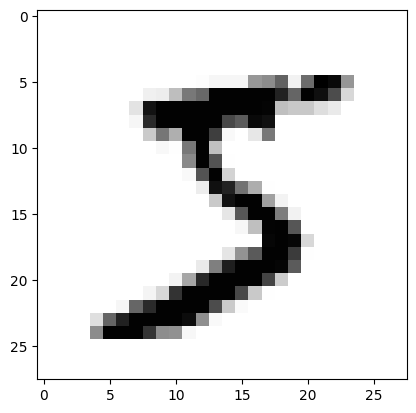

In [10]:
# String split and save in list
all_values = training_data_list[0].split(',')
# Convert string to float and reshape to 28x28
image_array = np.asfarray(all_values[1:]).reshape((28,28))
# Plot the image
plt.imshow(image_array, cmap='Greys', interpolation='None')
print(all_values[0])

In [11]:
# Normalize the input data (Trick to ensure that no null values are present which affects the calculation 
# of the weights
scaled_input = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
print(scaled_input)

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

In [12]:
# Create the labels for the output nodes
onodes = 10
targets = np.zeros(onodes) + 0.01
# On place of the list index, set the value to 0.99
targets[int(all_values[0])] = 0.99
targets

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.99, 0.01, 0.01, 0.01, 0.01])

In [13]:
## Training process
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# learning rate
learning_rate = 0.15

# Create an instance of the neural network
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)


Shape wih:  (100, 784)
Shape who:  (10, 100)


In [14]:
# Generate a random list of 784 values between 0 and 1
rand_i = np.random.random((784))
n.query(rand_i)

array([[0.01853962],
       [0.67272521],
       [0.0018581 ],
       [0.73427237],
       [0.00014869],
       [0.99516184],
       [0.02367127],
       [0.79635102],
       [0.5075946 ],
       [0.99310858]])

In [15]:
# Output weights from the hidden layer to the output layer before training
# Onw weight from n.who Before Training
n.who[0,0]


-0.034248959141666147

In [16]:
# go trough all records in the training data set
for record in training_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # scale and shift the inputs
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # Create target outputs values (all 0.01, except the desired label which is 0.99)
    targets = np.zeros(output_nodes) + 0.01
    # all_values[0] is the target label for this record
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)

In [17]:
# Same weight after training
n.who[0,0]

-0.3117394523469439

## Test Neural Network

In [18]:
all_test_values = test_data_list[0].split(',')

In [19]:
print(all_test_values[0])

7


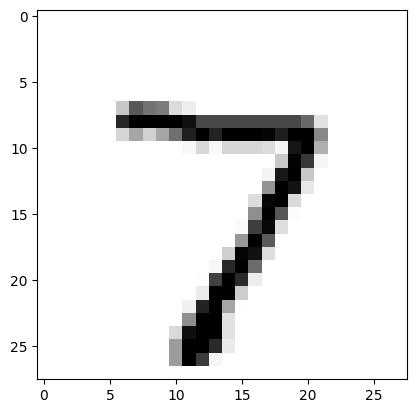

In [20]:
image_array = np.asfarray(all_test_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap='Greys', interpolation='None')

In [21]:
prediction = n.query((np.asfarray(all_test_values[1:]) / 255.0 * 0.99) + 0.01)
print(prediction)

[[0.01512637]
 [0.00483926]
 [0.01600075]
 [0.00847297]
 [0.001432  ]
 [0.00264947]
 [0.00606102]
 [0.98886198]
 [0.00031627]
 [0.00558061]]


In [22]:
# Give the index of the highest value in the array
print("Der Datensatz stellt die Zahl ", all_test_values[0], " dar.", "Prognostiziert wurde die Zahl", np.argmax(prediction))

Der Datensatz stellt die Zahl  7  dar. Prognostiziert wurde die Zahl 7


In [23]:
def clean_predict_data(data):
    # split the record by the ',' commas
    all_values = data.split(',')
    # scale and shift the inputs
    label = all_values[0]
    given_number = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

    print("Label: ", label)
    image_array = given_number.reshape((28,28))
    plt.imshow(image_array, cmap='Greys', interpolation='None')
    prediction = n.query(given_number)
    print("Der Datensatz stellt die Zahl ", data[0], " dar.", "Prognostiziert wurde die Zahl", np.argmax(prediction))

Label:  3
Der Datensatz stellt die Zahl  3  dar. Prognostiziert wurde die Zahl 3


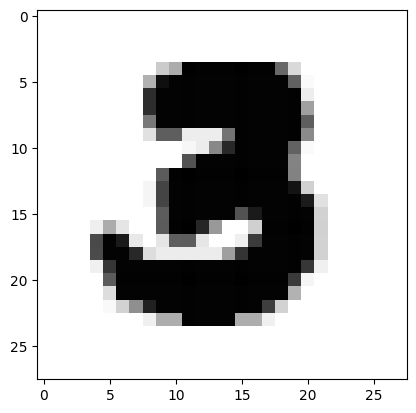

In [24]:
clean_predict_data(test_data_list[200])

In [25]:
def clean_predict_data_list(data):
    # split the record by the ',' commas
    all_values = data.split(',')
    # scale and shift the inputs
    label = all_values[0]
    given_number = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    prediction = n.query(given_number)
    return np.argmax(prediction)


In [26]:
# Create a list with predicted values of test data
prediction = []
for record in test_data_list:
    output = clean_predict_data_list(record)
    prediction.append(output)


In [27]:
# Extract labels from test_data_list
labels = []
for record in test_data_list:
    all_values = record.split(',')
    labels.append(int(all_values[0]))

<Axes: >

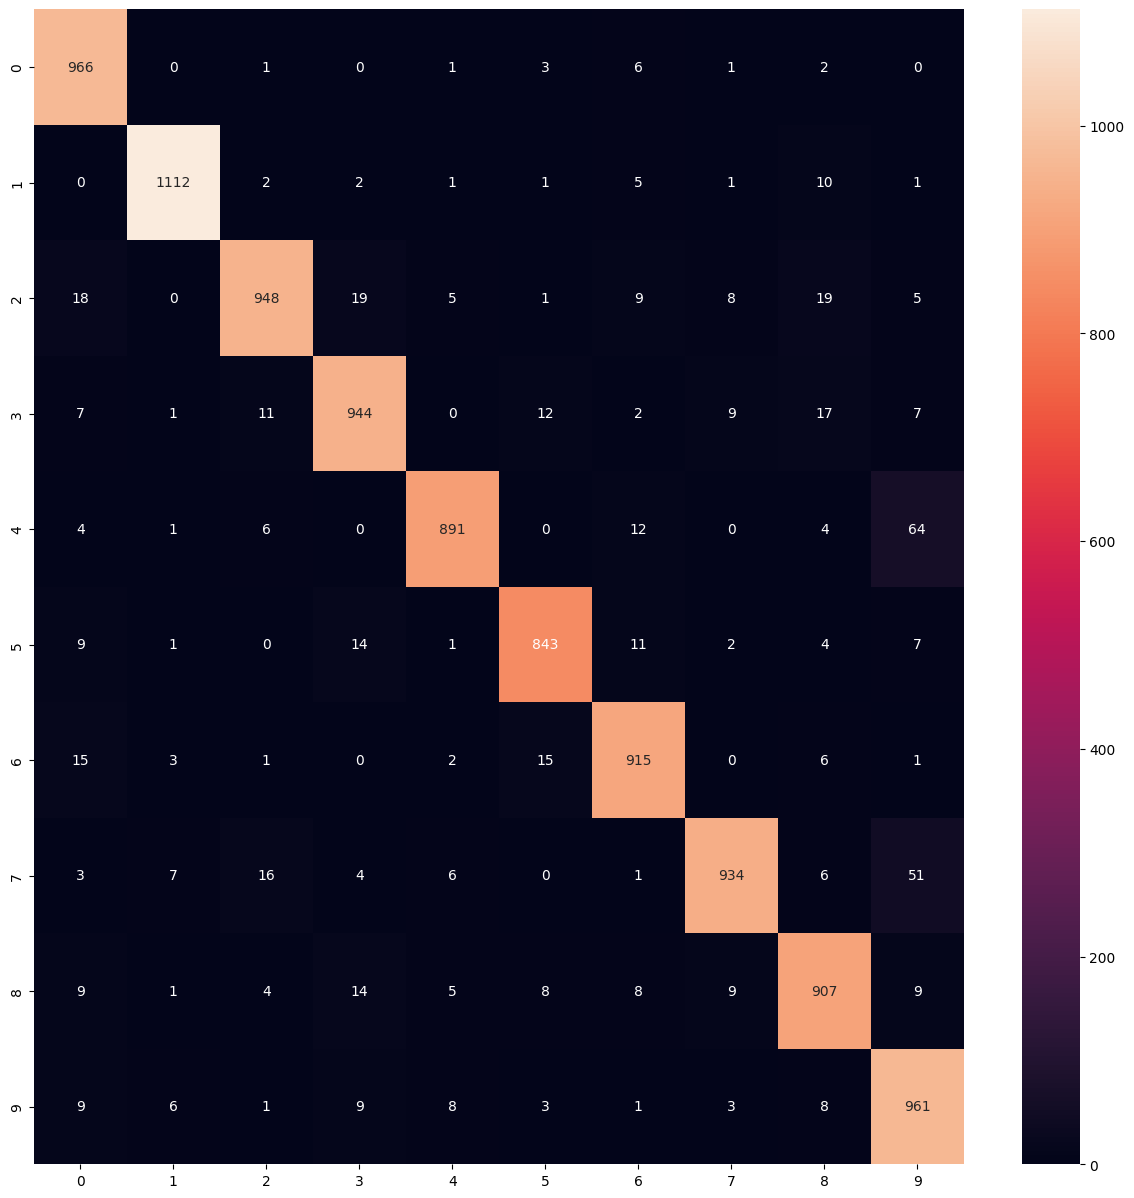

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create a confusion matrix
cm = confusion_matrix(labels, prediction)
# Plot the confusion matrix
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt="d")

In [29]:
# Calculate the accuracy using sklearn
from sklearn.metrics import accuracy_score
accuracy_score(labels, prediction)

0.9421